## Visualize the progress of training
All paths are relative.

In [118]:
%matplotlib inline 

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

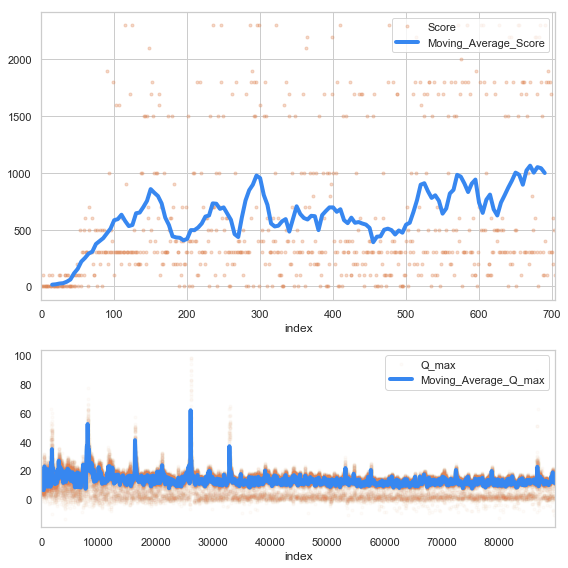

In [124]:
start = 0
interval = 30
step = 5

scores_df = pd.read_csv("./objects/scores_df.csv")
mean_scores = pd.DataFrame(columns =['index', 'Moving_Average_Score'])
actions_df = pd.read_csv("./objects/actions_df.csv")
max_scores = pd.DataFrame(columns =['index', 'Max_Score'])
mean_q_max_scores = pd.DataFrame(columns =['index', 'Moving_Average_Q_max'])

while start + interval <= len(scores_df):
    
    a1 = start + 0.5* interval
    b1 = (scores_df.loc[start:start + interval].mean()['scores'])
    mean_scores = mean_scores.append({'index' : a1 , 'Moving_Average_Score' : b1} , ignore_index=True)
    
    a2 = start + 0.5* interval
    b2 = (scores_df.loc[start:start + interval].max()['scores'])
    max_scores = max_scores.append({'index' : a2 , 'Max_Score' : b2} , ignore_index=True)
    
    start = start + step

q_max_df = pd.read_csv("./objects/q_values.csv")

start = 0
interval = 30
step = 60

while start + interval <=len(q_max_df):
    
    a3 = start + 0.5* interval
    b3 = (q_max_df.loc[start:start + interval].mean()['qvalues'])

    mean_q_max_scores = mean_q_max_scores.append({'index' : a3 , 'Moving_Average_Q_max' : b3} , ignore_index=True)
    
    start = start + step


fig, (ax1, ax2)= plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [1.618, 1]})
scores_df.plot(y='scores', label='Score', style='.', ax=ax1, color='C1', grid=True, alpha=0.3)
mean_scores.plot(x='index', y='Moving_Average_Score', style='-', linewidth=4.0, ax=ax1, color='#3787F0', grid=True, alpha=1)

q_max_df.plot(y='qvalues', label='Q_max', style='.', ax=ax2, color='C1', grid=True, alpha=0.03)
mean_q_max_scores.plot(x='index', y='Moving_Average_Q_max', style='-', linewidth=4.0, ax=ax2, color='#3787F0', grid=False, alpha=1)


ax1.legend(loc = 1)
ax2.legend(loc = 1)
plt.tight_layout()